

Import required libraries


In [4]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from time import time
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

Read dataset of car evaluation

In [5]:
dataset = pd.read_csv("car_evaluation.csv",
              names=["Buying", "Maintenance" , "Doors" , "Persons" , "Lug-Boot" , "Safety", "Class"])
dataset.head()

Encode categorical values of target variable to numerical

In [9]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
dataset['Class'] = labelEncoder.fit_transform(dataset.Class)
dataset['Class'].unique()

array([2, 0, 3, 1])

get features and target variables

In [21]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print("Shape of x: ", X.shape)
print("Shape of y: ", y.shape)

Shape of x:  (1728, 6)
Shape of y:  (1728,)


split into train and test data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)


Shape of x_train:  (1209, 6)
Shape of y_train:  (1209,)
shape of x_test:  (519, 6)
shape of y_test:  (519,)


Perform feature scaling with standardisation

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Descision tree classifier with default depth

In [49]:
t0=time()
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = DecisionTreeClassifier(max_depth=3)
# feeding the training data into the model
model.fit(X_train, y_train)

# finding the training and testing accuracy
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# printing the confusion Matrix
cm = confusion_matrix(y_train_pred, y_train)
print(cm)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

micro_precision = precision_score(y_test_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

t1=time()
print ("time elapsed: ", t1-t0)

[[269  44 173  49]
 [  0   0   0   0]
 [  0   0 674   0]
 [  0   0   0   0]]
Train score 0.7799834574028123
Test score 0.7726396917148363
Micro-averaged precision score: 0.77
time elapsed:  0.03508806228637695


 plotting the graph for performance of decision trees with different max_depth values

In [40]:
from sklearn.model_selection import GridSearchCV
max_depth = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])

params = {'max_depth': max_depth}
model = DecisionTreeClassifier()
# Use cross-validation to tune the hyperparameters
search = GridSearchCV(model, params, cv=5, scoring='accuracy')
search.fit(X, y)

# Print the best hyperparameters and score
print("Best hyperparameters:", search.best_params_)
print("Best score:", search.best_score_)

Best hyperparameters: {'max_depth': 10}
Best score: 0.7900125659713496


In [52]:

model = search.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

micro_precision = precision_score(y_test_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

Train score 0.9875930521091811
Test score 0.9633911368015414
Micro-averaged precision score: 0.96


In [28]:
tt0=time()
print ("cross result========")
scores = cross_val_score(decision_tree, X, y, cv=3)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[0.74305556 0.796875   0.81944444]
0.7864583333333334
time elapsed:  0.03503680229187012


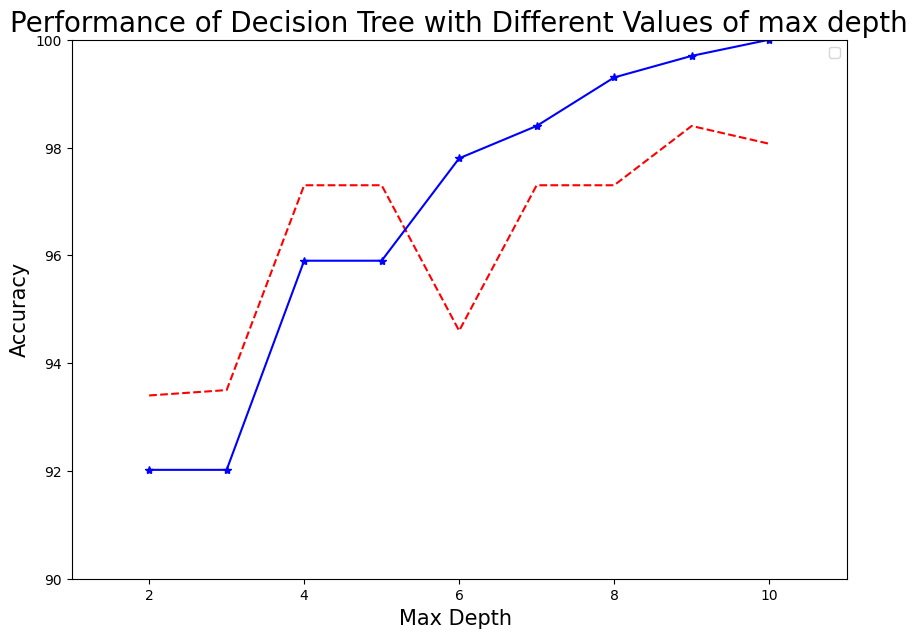

In [27]:
Training_Accuracy = np.array([93.4, 93.5, 97.3, 97.3, 94.6, 97.3, 97.3, 98.4, 98.07])
Testing_Accuracy = np.array([92.02, 92.02, 95.9, 95.9, 97.8, 98.4, 99.3, 99.7, 100.0])

plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(max_depth, Training_Accuracy, 'r--')
plt.plot(max_depth, Testing_Accuracy, 'b-*')
plt.title('Performance of Decision Tree with Different Values of max depth', fontsize = 20)
plt.xlim([1, 11])
plt.ylim([90, 100])
plt.xlabel('Max Depth ', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()
